# Adjustment volume

- データセットをオーギュメンテーションするために録音したデータの音量を調節する
    - volumeノブの変更によって判定結果が変化することを防ぐため

## ライブラリのインポート

In [1]:
import os
import time

import numpy as np
import matplotlib.pyplot as plt

import sounddevice as sd
import librosa
import librosa.display

## 各種関数の定義

In [17]:
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_sftf = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_sftf, n_mels=128)
    return melsp

def show_wave(x):
    plt.plot(x)
    plt.show()

def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs)
    plt.colorbar()
    plt.show()

## インプットデバイスとアウトプットデバイスの設定

In [2]:
sd.default.device = [1, 10]

print(f"Input: {sd.query_devices(kind='input')['name']}")
print(f"output: {sd.query_devices(kind='output')['name']}")

Input: Mic | Line 1/2 (Audient EVO4)
output: Speaker (Realtek(R) Audio)


## 演奏の録音

In [4]:
fs = 22050
duration = 3

data = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait()

sd.play(data, fs)

## 演奏データの音量調整

wave size:(66150,)
melsp size:(128, 517)
sampling rate:22050


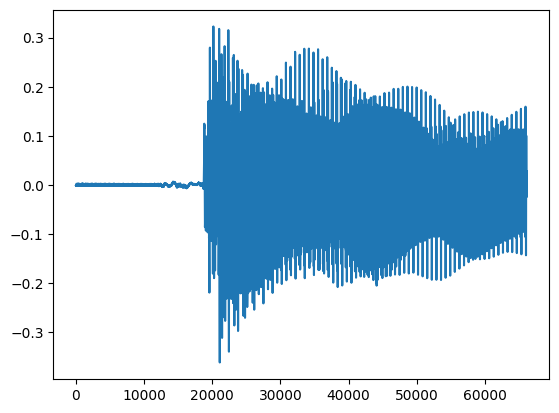

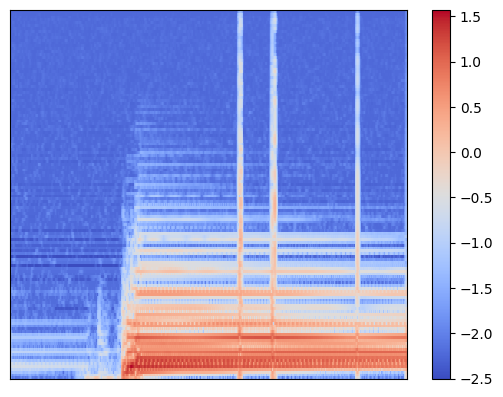

In [23]:
adjusted_data = data * 5
sd.play(adjusted_data, fs)

x = adjusted_data.reshape(len(adjusted_data))
melsp = calculate_melsp(x)
print("wave size:{0}\nmelsp size:{1}\nsampling rate:{2}".format(x.shape, melsp.shape, fs))
show_wave(x)
show_melsp(melsp, fs)